In [2]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
# library(xkcd)
# library(sysfonts)

source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘wesanderson’ was built under R version 3.4.4”Warning message:
“package ‘ggridges’ was built under R version 3.4.4”
Attaching package: ‘ggridges’

The following object is masked from ‘package:ggplot2’:

    scale_discrete_manual

Warning message:
“package ‘

In [3]:
# font_import()
# loadfonts()

In [4]:
#get correct home path based on os 
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

fig_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/figures/')

In [5]:
ls_obs_data <- read_csv('combined_learning_sig_obs_data.csv',col_types = cols())

ls_obs_data$condition <- factor(ls_obs_data$condition, levels = c("hc", "lc", "hv", "lv"))

Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [27]”

In [6]:
#set default title position to center 
theme_update(plot.title = element_text(hjust = 0.5))

In [7]:
#add p(r) variable
hc_high_p = 0.65
lc_high_p = 0.85

vol_high_p = 0.75

ls_obs_data[ls_obs_data$condition == 'hc', 'high_p'] = hc_high_p
ls_obs_data[ls_obs_data$condition == 'lc', 'high_p'] = lc_high_p
ls_obs_data[(ls_obs_data$condition == 'lv'| ls_obs_data$condition == 'hv'), 'high_p'] = vol_high_p

ls_obs_data[, 'low_p'] <- 1 - ls_obs_data$high_p

#for each target
ls_obs_data[, 't0_p'] <- ifelse(ls_obs_data$p_id_solution == 111, ls_obs_data$high_p, ls_obs_data$low_p)
ls_obs_data[, 't1_p'] <- 1-ls_obs_data$t0_p

In [8]:
head(ls_obs_data)

cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,⋯,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy,high_p,low_p,t0_p,t1_p
0.09947117,0.0000000,0.0000000,1,0.01357246,0.4164061,761,0.0000000,0.0000000,2.528877,⋯,0.3055556,36,111,111,111,1,0.65,0.35,0.65,0.35
0.03507879,0.0000000,0.0000000,0,0.01357246,0.5994712,761,1.3902137,0.1492068,0.000000,⋯,0.3055556,36,111,112,112,0,0.65,0.35,0.65,0.35
0.02307522,-1.2410069,1.2410069,0,0.01357246,0.5350788,761,0.7923717,0.1965910,0.000000,⋯,0.3055556,36,111,112,111,1,0.65,0.35,0.65,0.35
0.01988090,-0.5957808,0.5957808,0,-1.00000000,0.5230752,761,0.5328022,0.2266674,0.000000,⋯,0.3055556,36,111,112,112,0,0.65,0.35,0.65,0.35
0.01853869,-0.3061348,0.3061348,0,-1.00000000,0.5198809,761,0.3913762,0.2519824,0.000000,⋯,0.3055556,36,111,112,111,1,0.65,0.35,0.65,0.35
0.26853762,-0.1393938,0.1393938,0,-1.00000000,0.5185387,761,0.3028040,0.2751190,3.036967,⋯,0.3055556,36,111,111,111,1,0.65,0.35,0.65,0.35


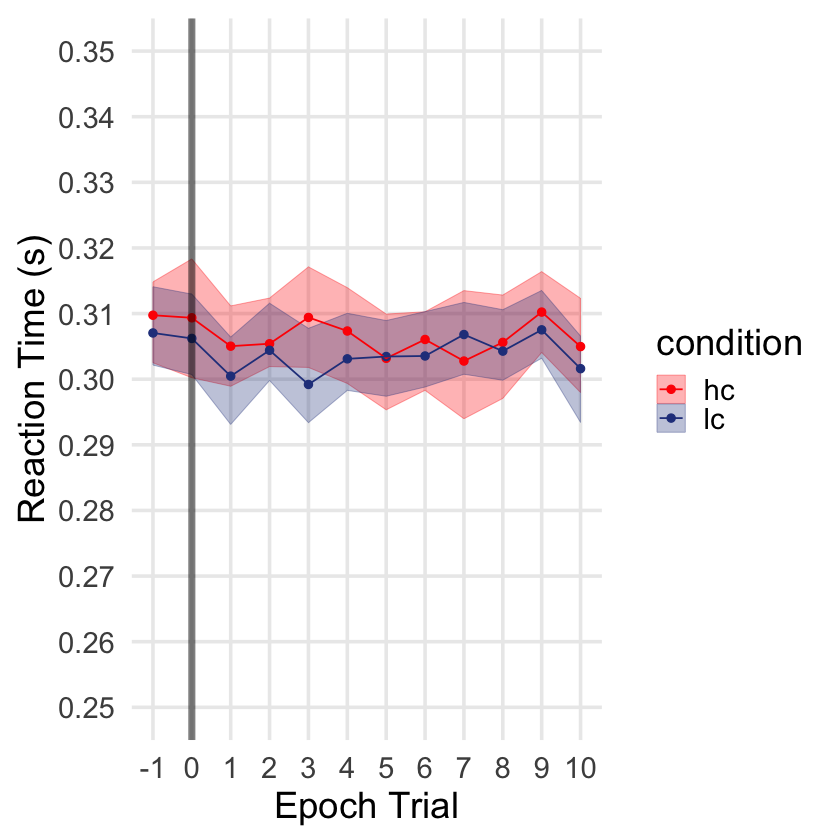

In [8]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) +
stat_summary(fun.y = median, geom = "line") +
theme_gray(40)  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.35, .01)) + coord_cartesian(ylim = c(0.25,0.35)) +
geom_vline(xintercept = 0, size=2, alpha=0.5) + theme_minimal(base_size=22) + xlab("Epoch Trial") + ylab("Reaction Time (s)")  + 
scale_fill_manual(values = c("lc"="royalblue4", "hc"="red1")) + scale_color_manual(values=c("lc"="royalblue4", "hc"="red1")) + theme(panel.grid.minor =  element_blank())
ggsave(paste0(fig_path, "conf_rt_median_locked.png"), width=7, height=5, dpi=600)

In [ ]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3) + stat_summary(fun.y = median, geom = "point", size=2) + 
stat_summary(fun.y = median, geom = "line") +
theme_gray(40)  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.35, .01)) + coord_cartesian(ylim = c(0.25,0.35)) +
geom_vline(xintercept = 0, size=2, alpha=0.5) + theme_minimal(base_size=22) + xlab("Epoch Trial") + ylab("Reaction Time (s)")  + 
scale_fill_manual(values=c("lv"="seagreen4", "hv"="orchid4")) +scale_color_manual(values=c("lv"="seagreen4", "hv"="orchid4"))  + theme(panel.grid.minor =  element_blank())
ggsave(paste0(fig_path, "vol_rt_median_locked.png"), width=7, height=5, dpi=600) 

In [7]:
min_epoch_n_conf = min(ls_obs_data$max_epoch_n[ls_obs_data$condition == 'lc'|ls_obs_data$condition == 'hc'])
min_epoch_n_lv = min(ls_obs_data$max_epoch_n[ls_obs_data$condition == 'lv'])
min_epoch_n_hv = min(ls_obs_data$max_epoch_n[ls_obs_data$condition == 'hv'])

In [8]:
min_epoch_n_conf; min_epoch_n_hv; min_epoch_n_lv

[1] 22

[1] 37

[1] 16

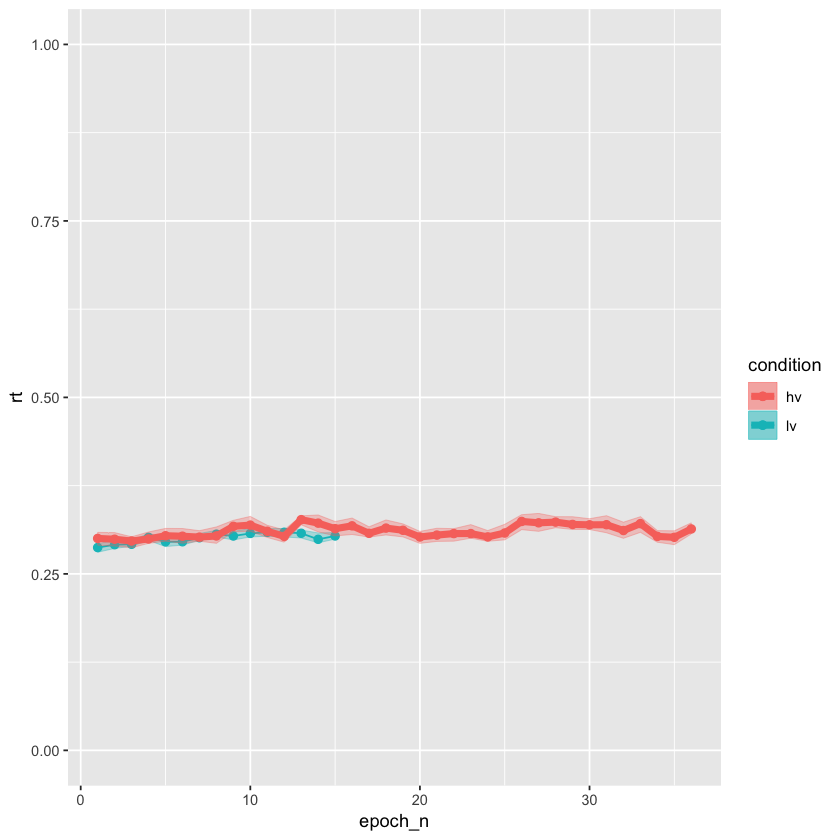

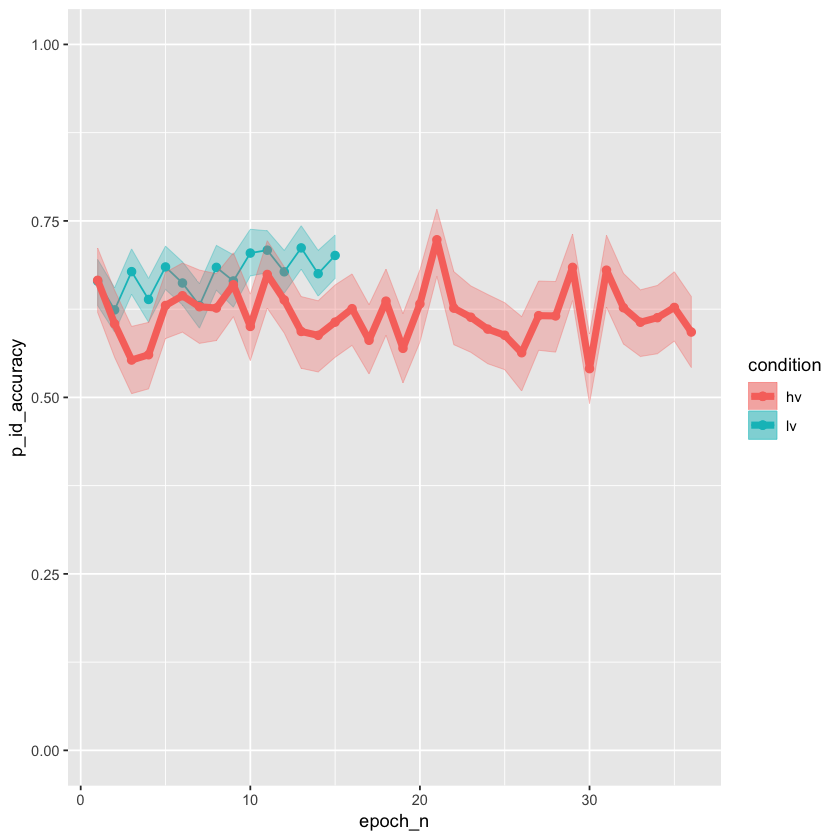

In [26]:
ggplot(subset(ls_obs_data, epoch_n < min_epoch_n_lv & (condition == 'lv')), aes(epoch_n, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3) + stat_summary(fun.y = median, geom = "point", size=2) + 
stat_summary(fun.y = median, geom = "line") + coord_cartesian(ylim = c(0,1))  + stat_summary(data = subset(ls_obs_data, epoch_n < min_epoch_n_hv & (condition == 'hv')), 
                                                                                            fun.y=median, geom='point', size=2) + stat_summary(data = subset(ls_obs_data, epoch_n < min_epoch_n_hv & (condition == 'hv')), 
                                                                                            fun.y=median, geom='line', size=2) + stat_summary(data = subset(ls_obs_data, epoch_n < min_epoch_n_hv & (condition == 'hv')), fun.data = median_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3)
# ggsave(paste0(fig_path, "all_conf_subject_acc_test.png"), width=7, height=7, dpi=600) 

ggplot(subset(ls_obs_data, epoch_n < min_epoch_n_lv & (condition == 'lv')), aes(epoch_n, p_id_accuracy, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3) + stat_summary(fun.y = mean, geom = "point", size=2) + 
stat_summary(fun.y = mean, geom = "line") + coord_cartesian(ylim = c(0,1)) + stat_summary(data = subset(ls_obs_data, epoch_n < min_epoch_n_hv & (condition == 'hv')), 
                                                                                            fun.y=mean, geom='point', size=2) + stat_summary(data = subset(ls_obs_data, epoch_n < min_epoch_n_hv & (condition == 'hv')), 
                                                                                            fun.y=mean, geom='line', size=2) + stat_summary(data = subset(ls_obs_data, epoch_n < min_epoch_n_hv & (condition == 'hv')), fun.data = mean_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3)

# ggsave(paste0(fig_path, "all_conf_subject_acc_test.png"), width=7, height=7, dpi=600) 

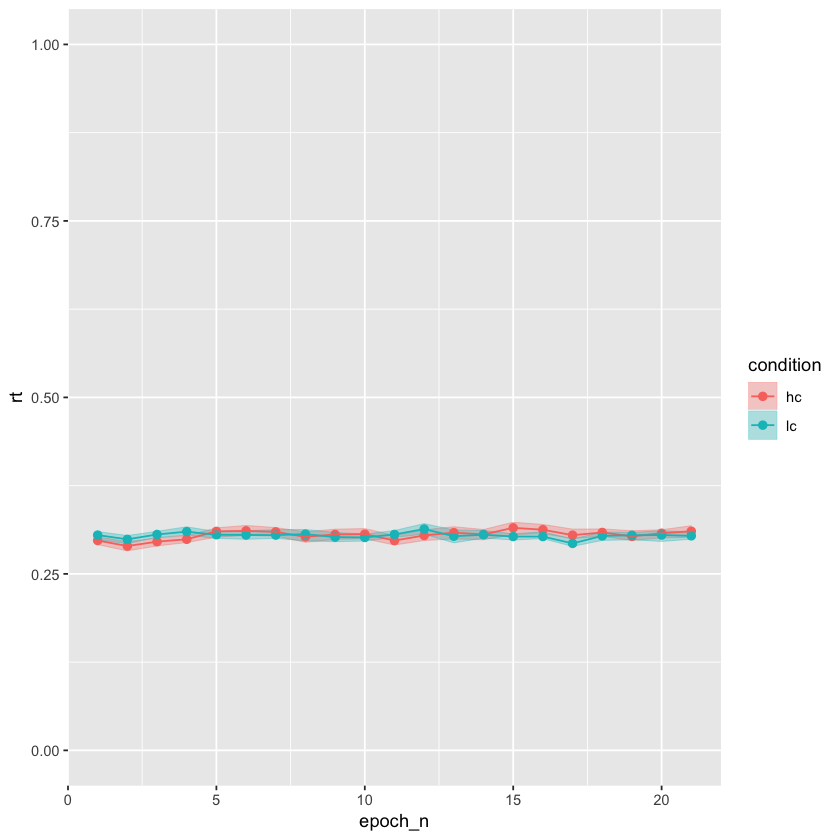

In [28]:
ggplot(subset(ls_obs_data, epoch_n < min_epoch_n_conf & (condition == 'lc'| condition == 'hc')), aes(epoch_n, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3) + stat_summary(fun.y = median, geom = "point", size=2) + 
stat_summary(fun.y = median, geom = "line") + coord_cartesian(ylim = c(0,1)) 
# ggsave(paste0(fig_path, "all_conf_subject_acc_test.png"), width=7, height=7, dpi=600) 

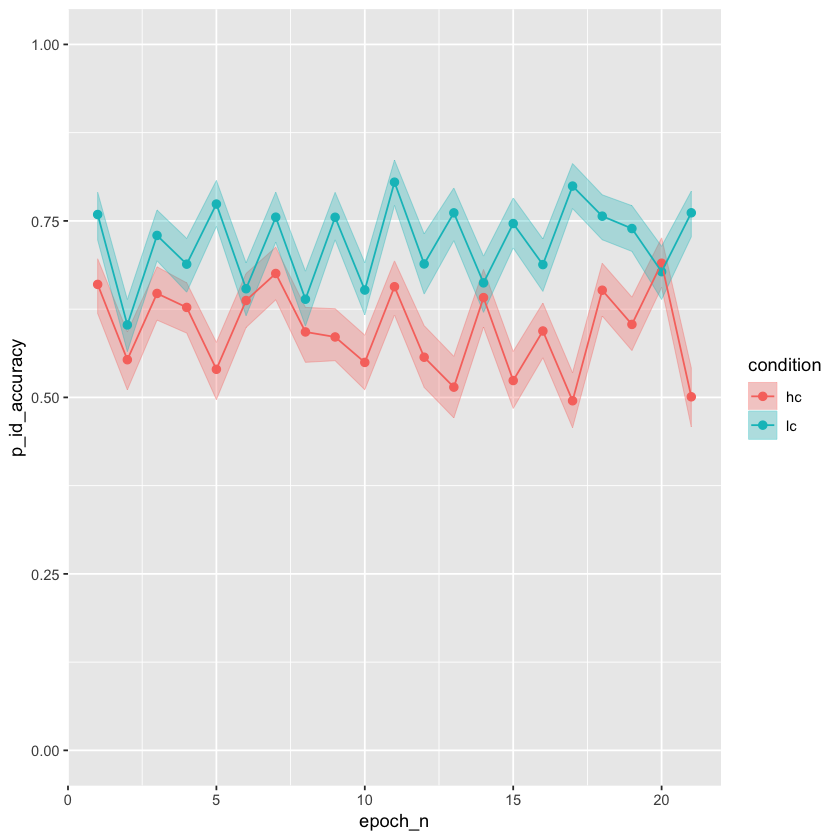

In [29]:
ggplot(subset(ls_obs_data, epoch_n < min_epoch_n_conf & (condition == 'lc'| condition == 'hc')), aes(epoch_n, p_id_accuracy, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3) + stat_summary(fun.y = mean, geom = "point", size=2) + 
stat_summary(fun.y = mean, geom = "line") + coord_cartesian(ylim = c(0,1)) 
# ggsave(paste0(fig_path, "all_conf_subject_acc_test.png"), width=7, height=7, dpi=600) 

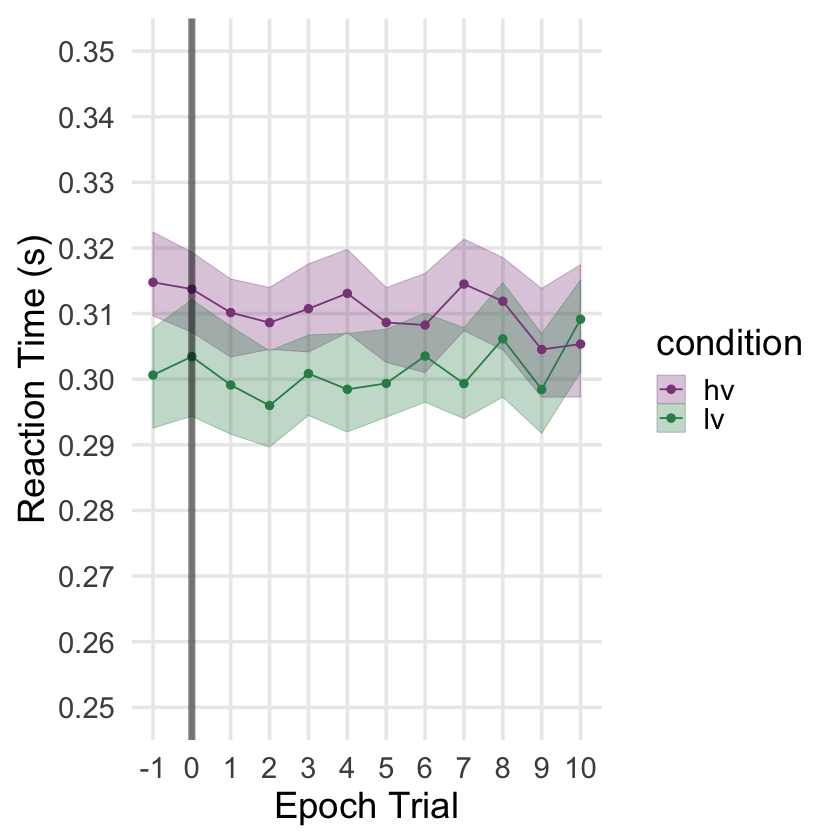

In [9]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon",  size=.1, aes(fill=condition), alpha=.3) + stat_summary(fun.y = median, geom = "point", size=2) + 
stat_summary(fun.y = median, geom = "line") +
theme_gray(40)  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.35, .01)) + coord_cartesian(ylim = c(0.25,0.35)) +
geom_vline(xintercept = 0, size=2, alpha=0.5) + theme_minimal(base_size=22) + xlab("Epoch Trial") + ylab("Reaction Time (s)")  + 
scale_fill_manual(values=c("lv"="seagreen4", "hv"="orchid4")) +scale_color_manual(values=c("lv"="seagreen4", "hv"="orchid4"))  + theme(panel.grid.minor =  element_blank())
ggsave(paste0(fig_path, "vol_rt_median_locked.png"), width=7, height=5, dpi=600) 

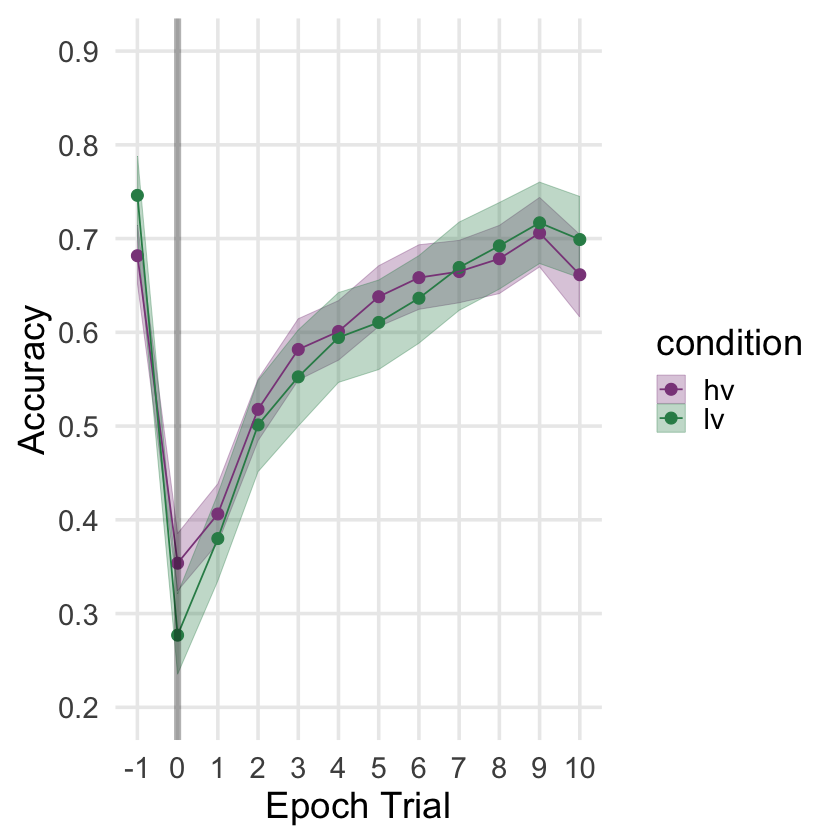

In [10]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), 
       aes(shifted_epoch_trial_zero_idx, p_id_accuracy, col=condition)) +
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1, aes(fill=condition), alpha=0.3) + stat_summary(fun.y = mean, geom = "point", size=3) +
stat_summary(fun.y = mean, geom = "line") +
theme_gray(40)  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + coord_cartesian(ylim = c(0.2,.9)) +
geom_vline(xintercept = 0, size=2, alpha=0.3) +  theme_minimal(base_size=22) + theme_minimal(base_size=22) + xlab("Epoch Trial") + ylab("Accuracy") +
scale_fill_manual(values=c("lv"="seagreen4", "hv"="orchid4")) +scale_color_manual(values=c("lv"="seagreen4", "hv"="orchid4")) + theme(panel.grid.minor =  element_blank())


ggsave(paste0(fig_path, "vol_acc_locked.png"), width=7, height=5, dpi=600)

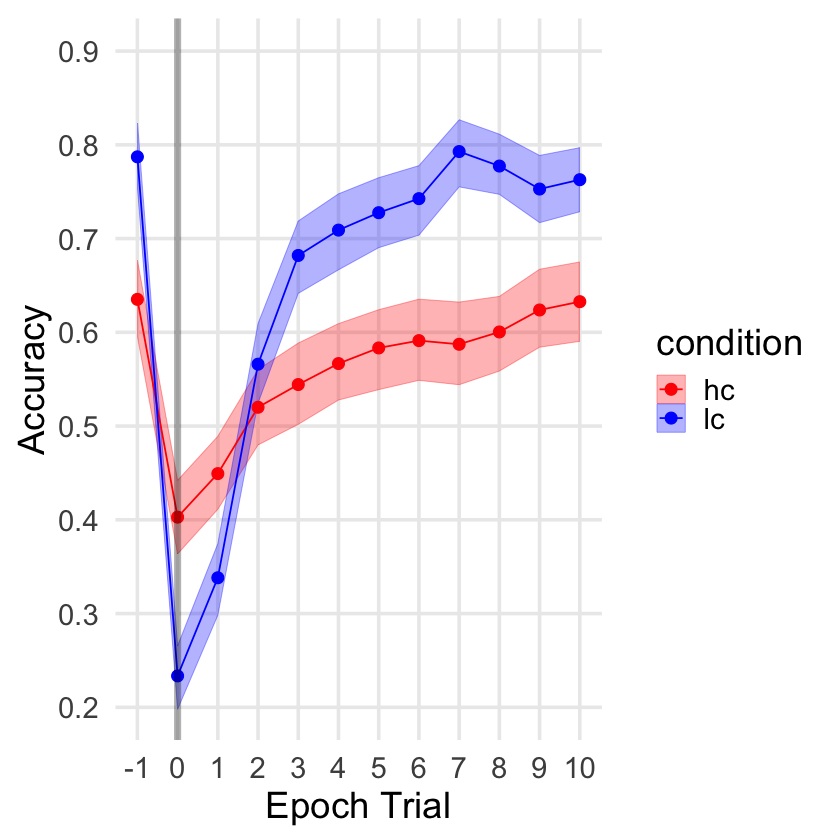

In [11]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, p_id_accuracy, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1, aes(fill=condition), alpha=0.3) + stat_summary(fun.y = mean, geom = "point", size=3) +
 stat_summary(fun.y = mean, geom = "line") +
theme_gray(40)  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.9, .1)) + coord_cartesian(ylim = c(0.2,.9)) +
geom_vline(xintercept = 0, size=2, alpha=0.3) + theme_minimal(base_size=22) + xlab("Epoch Trial") + ylab("Accuracy")  + 
scale_fill_manual(values = c("lc"="blue", "hc"="red1")) + scale_color_manual(values=c("lc"="blue", "hc"="red1")) + theme(panel.grid.minor =  element_blank())

ggsave(paste0(fig_path, "conf_acc_locked.png"), width=7, height=5, dpi=600)

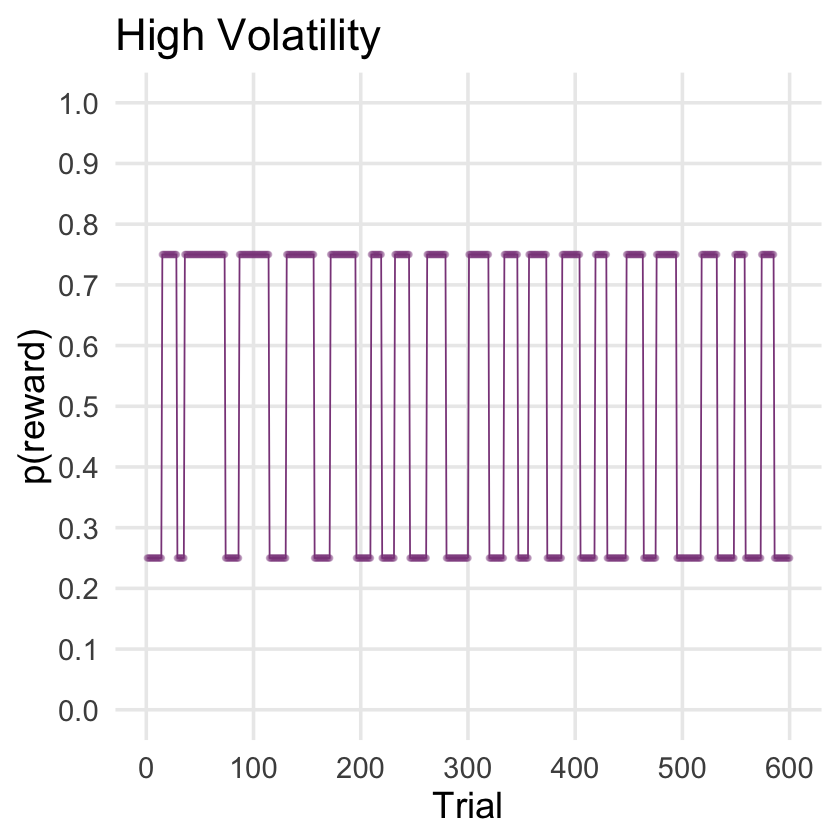

In [65]:
ggplot(subset(ls_obs_data, condition == 'hv' & ID == 762), aes(repeat_trial, t0_p, col=condition)) + geom_point(alpha=0.3) + geom_line() + 
theme_gray(40) + theme_minimal(base_size=22) + xlab("Trial") + ylab("p(reward)")  + 
theme(panel.grid.minor =  element_blank(), legend.position = 'none') + scale_fill_manual(values=c("hv"="orchid4")) + scale_color_manual(values=c("hv"="orchid4"))  + scale_y_continuous(breaks=seq(0,1, .1)) + coord_cartesian(ylim = c(0,1)) +
scale_x_continuous(breaks=seq(0,600, 100)) + ggtitle('High Volatility') + 

ggsave(paste0(fig_path, "sample_prob_reward_hv.png"), width=7, height=5, dpi=600)

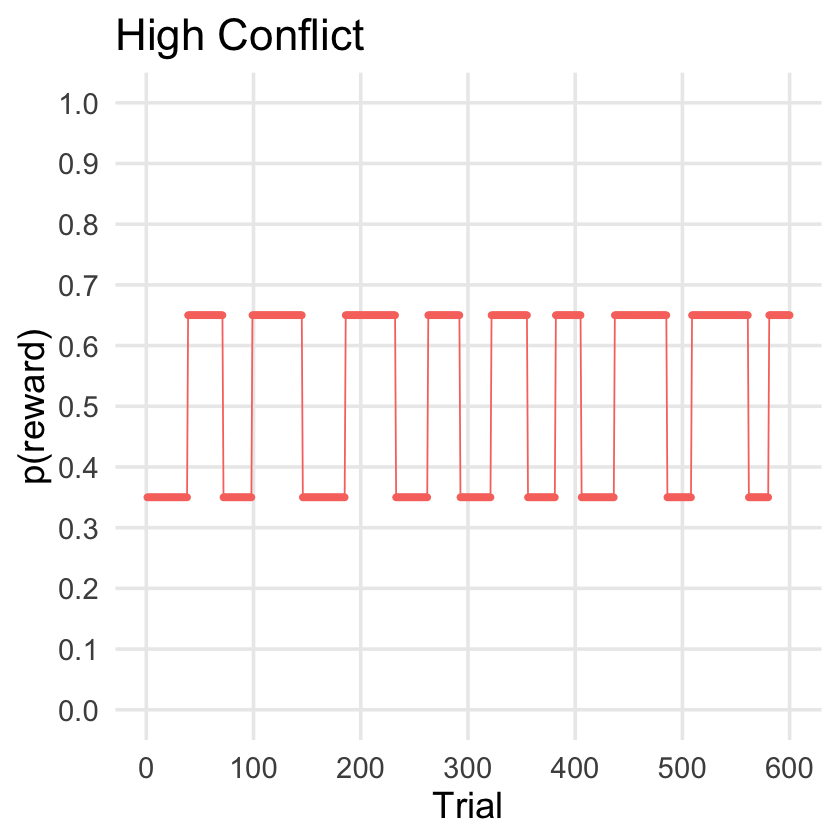

In [66]:
theme_update(plot.title = element_text(hjust = 0.5))

ggplot(subset(ls_obs_data, (condition == 'hc') & ID == 774), aes(repeat_trial, t0_p, col=condition)) + geom_point() + geom_line() + 
theme_minimal(base_size=22) + xlab("Trial") + ylab("p(reward)")  + 
theme(panel.grid.minor =  element_blank(), legend.position = 'none')  + scale_y_continuous(breaks=seq(0,1, .1)) + coord_cartesian(ylim = c(0,1)) + scale_x_continuous(breaks=seq(0,600, 100))  + 
ggtitle('High Conflict')
ggsave(paste0(fig_path, "sample_prob_reward_hc.png"), width=7, height=5, dpi=600)

In [92]:
reward_value_dist = rnorm(3,1, n = 1200)
reward_value_dist_df = as.data.frame(reward_value_dist)

In [178]:
# library("SciencesPo", quietly = TRUE)
install.packages("SciencesPo")

Warning message:
“package ‘SciencesPo’ is not available (for R version 3.4.3)”

Saving 7 x 7 in image


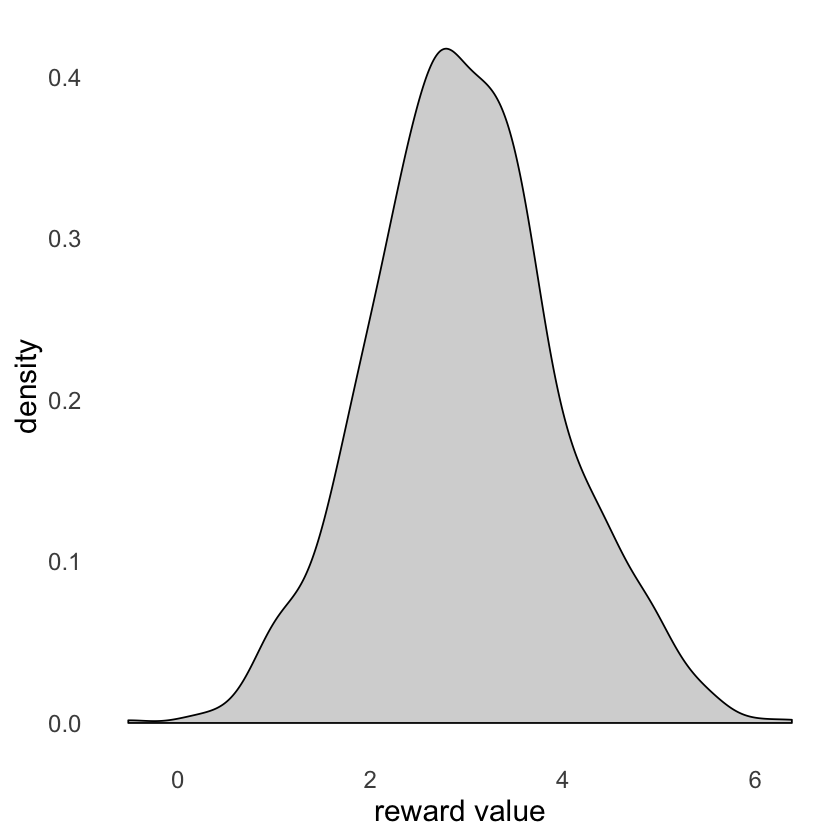

In [181]:
ggplot(reward_value_dist_df, aes(x=reward_value_dist)) + geom_density(fill = 'black', alpha=0.2 )+ 
theme_minimal(base_size=22) + xlab('reward value') + theme_minimal(base_size = 18) +  theme(panel.grid.minor =  element_blank(), legend.position = 'none', panel.grid.major = element_blank(), axis.ticks.y=element_blank())

ggsave(paste0(fig_path, "sample_reward_value_dist.png"), dpi=600)

In [17]:
ls_obs_data$condition <- factor(ls_obs_data$condition, levels = c("lc", "hc", "lv", "hv") )

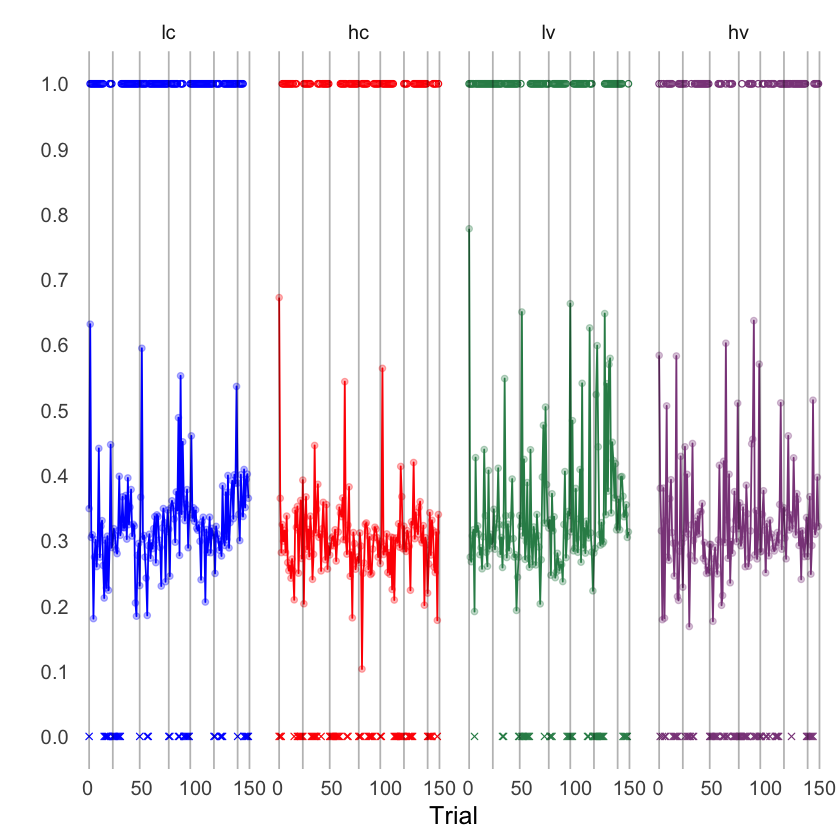

In [18]:
sample_ID = subset(ls_obs_data, ID == 769 & repeat_trial < 150)
ggplot(sample_ID, aes(repeat_trial, rt, col=condition)) + geom_point(alpha=0.3) + geom_line() + 
theme_gray(40) + theme_minimal(base_size=15) + xlab("Trial") + 
theme(panel.grid.minor =  element_blank(), panel.grid.major= element_blank(), legend.position = '') +  scale_y_continuous(breaks=seq(0,1, .1)) + coord_cartesian(ylim = c(0,1), xlim =  c(0,150)) +  

geom_point(aes(repeat_trial, p_id_accuracy, shape=factor(p_id_accuracy)) ) + facet_grid(.~condition) +  geom_vline(xintercept=which(sample_ID$cp_with_slow_fast == 1), 
                                                                                                                  color='black', alpha=0.3)+
scale_x_continuous(breaks=seq(0,150, 50)) + facet_grid(.~condition) + scale_color_manual(values=c("lc"="blue", "hc"="red1","lv"="seagreen4", "hv"="orchid4", 
                                                                                                  "0"='red', "1"='forestgreen')) + 
scale_shape_manual(values=c(4,1)) + ylab('')

ggsave(paste0(fig_path, "sample_rt_accuracy.png"), width=10, height=5, dpi=600)

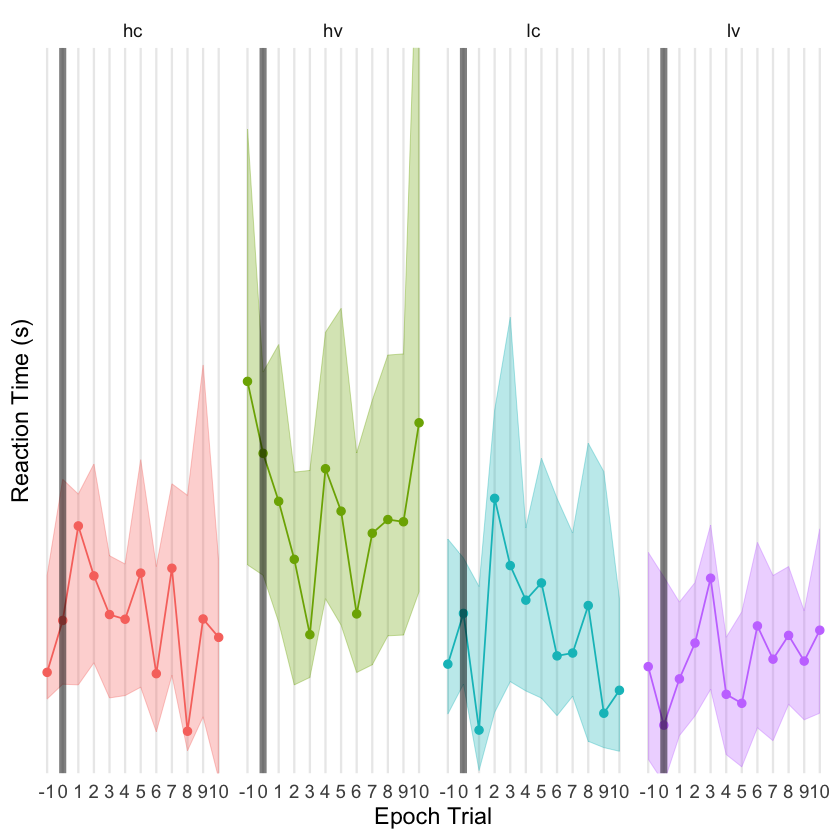

In [129]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1  & ID == 763)), aes(shifted_epoch_trial_zero_idx, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) +
stat_summary(fun.y = median, geom = "line") +
theme_gray(40)  + 
geom_vline(xintercept = 0, size=2, alpha=0.5) + theme_minimal(base_size=14) + xlab("Epoch Trial") + ylab("Reaction Time (s)")  + facet_grid(.~condition) +
 theme(panel.grid.minor =  element_blank(), legend.position = 'none')
# ggsave(paste0(fig_path, "conf_rt_median_locked.png"), width=7, height=5, dpi=600)

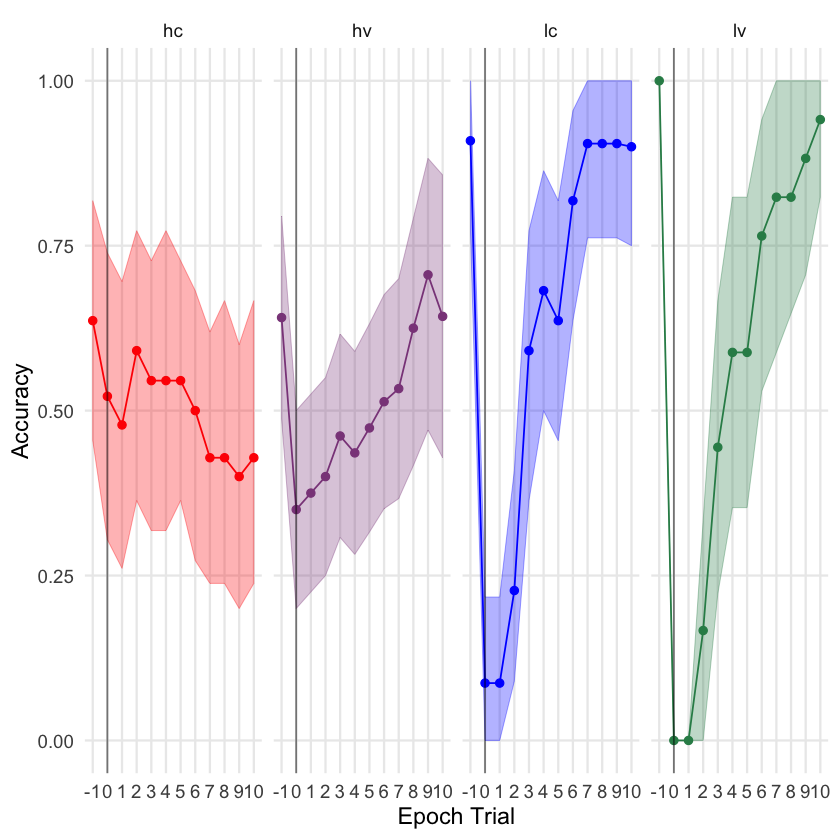

In [163]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1  & ID == 770)), aes(shifted_epoch_trial_zero_idx, p_id_accuracy, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") +
theme_gray(40)  + 
# scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.55, .5)) + coord_cartesian(ylim = c(0.25,0.55)) +
geom_vline(xintercept = 0, size=.5, alpha=0.5) + theme_minimal(base_size=14) + xlab("Epoch Trial") + ylab("Accuracy")  + facet_grid(.~condition) +
 theme(panel.grid.minor =  element_blank(), legend.position = 'none')  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0,1, .25)) + coord_cartesian(ylim = c(0, 1)) +
 scale_color_manual(values=c("lc"="blue", "hc"="red1","lv"="seagreen4", "hv"="orchid4")) +  scale_fill_manual(values=c("lc"="blue", "hc"="red1","lv"="seagreen4", "hv"="orchid4")) 
ggsave(paste0(fig_path, "acc_sample.png"), width=15, height=5, dpi=600)

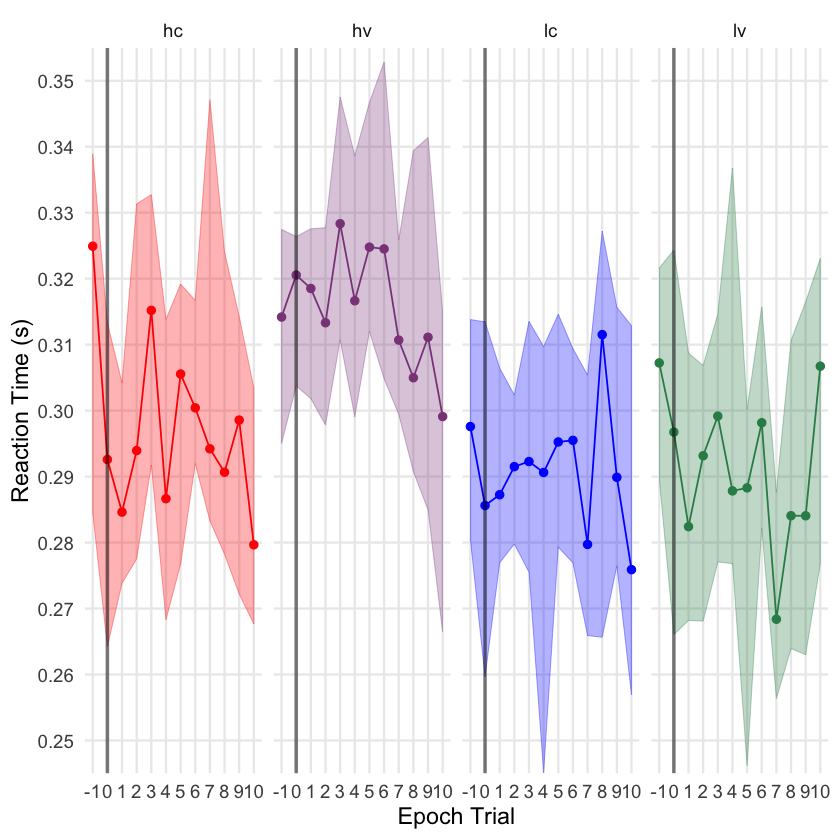

In [164]:
ggplot(subset(ls_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1  & ID == 770)), aes(shifted_epoch_trial_zero_idx, rt, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) +
stat_summary(fun.y = median, geom = "line") +
theme_gray(40)  + scale_x_continuous(breaks = seq(-4, 10, 1)) + scale_y_continuous(breaks=seq(0.2,.35, .01)) + coord_cartesian(ylim = c(0.25,0.35)) +
geom_vline(xintercept = 0, size=1, alpha=0.5) + theme_minimal(base_size=14) + xlab("Epoch Trial") + ylab("Reaction Time (s)")  + facet_grid(.~condition) +
 theme(panel.grid.minor =  element_blank(), legend.position = 'none')  +
 scale_color_manual(values=c("lc"="blue", "hc"="red1","lv"="seagreen4", "hv"="orchid4")) +  scale_fill_manual(values=c("lc"="blue", "hc"="red1","lv"="seagreen4", "hv"="orchid4")) 
ggsave(paste0(fig_path, "rt_sample.png"), width=15, height=5, dpi=600)